In [7]:
import numpy as np
import pickle, gzip

from matplotlib.mlab import frange

import perceptron as p
import sys
from matplotlib import pyplot as plt
from data import Data 
import numpy as np

data = Data(classes=["positive", "negative"], stemmed=True, normalized=True)

train_x, train_y, test_x, test_y = data.word2vec_vectorized()
train_y = np.array(list(map(lambda x: 0 if x=="NEGATIVE" else 1, train_y)))
test_y = np.array(list(map(lambda x: 0 if x=="NEGATIVE" else 1, test_y)))
train_x.shape # (3638, 16615)

(3638, 400)

In [8]:
train_y = train_y.reshape((-1, 1))
w0 = np.zeros(train_x.shape[1])
b0 = 0

w,b = p.minimize_l2loss(train_x, train_y, w0, b0)

Num iter:  0
Num iter:  1
Num iter:  2
Num iter:  3
Num iter:  4
Num iter:  5
Num iter:  6
Num iter:  7
Num iter:  8
Num iter:  9
Num iter:  10
Num iter:  11
Num iter:  12
Num iter:  13
Num iter:  14
Num iter:  15
Num iter:  16
Num iter:  17
Num iter:  18
Num iter:  19
Num iter:  20
Num iter:  21
Num iter:  22
Num iter:  23
Num iter:  24
Num iter:  25
Num iter:  26
Num iter:  27
Num iter:  28
Num iter:  29
Num iter:  30
Num iter:  31
Num iter:  32
Num iter:  33
Num iter:  34
Num iter:  35
Num iter:  36
Num iter:  37
Num iter:  38
Num iter:  39
Num iter:  40
Num iter:  41
Num iter:  42
Num iter:  43
Num iter:  44
Num iter:  45
Num iter:  46
Num iter:  47
Num iter:  48
Num iter:  49
Num iter:  50
Num iter:  51
Num iter:  52
Num iter:  53
Num iter:  54
Num iter:  55
Num iter:  56
Num iter:  57
Num iter:  58
Num iter:  59
Num iter:  60
Num iter:  61
Num iter:  62
Num iter:  63
Num iter:  64
Num iter:  65
Num iter:  66
Num iter:  67
Num iter:  68
Num iter:  69
Num iter:  70
Num iter:  71
Nu

Num iter:  568
Num iter:  569
Num iter:  570
Num iter:  571
Num iter:  572
Num iter:  573
Num iter:  574
Num iter:  575
Num iter:  576
Num iter:  577
Num iter:  578
Num iter:  579
Num iter:  580
Num iter:  581
Num iter:  582
Num iter:  583
Num iter:  584
Num iter:  585
Num iter:  586
Num iter:  587
Num iter:  588
Num iter:  589
Num iter:  590
Num iter:  591
Num iter:  592
Num iter:  593
Num iter:  594
Num iter:  595
Num iter:  596
Num iter:  597
Num iter:  598
Num iter:  599
Num iter:  600
Num iter:  601
Num iter:  602
Num iter:  603
Num iter:  604
Num iter:  605
Num iter:  606
Num iter:  607
Num iter:  608
Num iter:  609
Num iter:  610
Num iter:  611
Num iter:  612
Num iter:  613
Num iter:  614
Num iter:  615
Num iter:  616
Num iter:  617
Num iter:  618
Num iter:  619
Num iter:  620
Num iter:  621
Num iter:  622
Num iter:  623
Num iter:  624
Num iter:  625
Num iter:  626
Num iter:  627
Num iter:  628
Num iter:  629
Num iter:  630
Num iter:  631
Num iter:  632
Num iter:  633
Num iter: 

In [3]:
model_file = "perceptron_word2vec_stemmed_normalized.pickle" #to write
with open(model_file, 'wb+') as cache:
    pickle.dump((w, b), cache, protocol=2)


In [4]:
import os
model_file = "perpickle" # to test
if os.path.isfile(model_file):
    with open(model_file, 'rb') as cache:
        w, b = pickle.load(cache)

In [9]:
test_x.shape

(910, 400)

67.2527472527 % of test examples classified correctly.


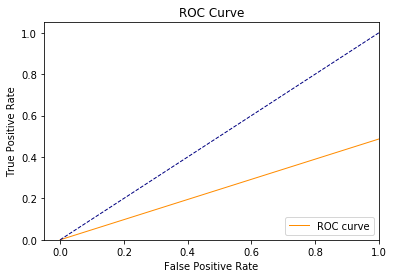

C:\Users\Selim\PycharmProjects\turkish-news-analytics\sentiment-classification\perceptron.py:80: RuntimeWarning: invalid value encountered in long_scalars
  p.append(true_pos / (true_pos + false_pos))


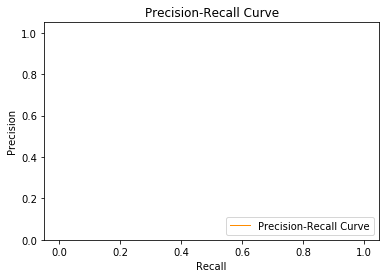

In [10]:
f_result = p.f(test_x, w, b)
yhat = f_result >= 0.5
yhat = yhat.reshape((-1))

print(np.mean(yhat==test_y)*100, "% of test examples classified correctly.")

yhat = yhat.reshape((-1))
p.roc_curve(test_y, f_result)
p.precision_recall_curve(test_y, f_result)